<a href="https://colab.research.google.com/github/Ian-Ibrahim/SU-Machine-learning-1222785/blob/main/Text_classification_1222785_icsB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [ ]:
df = pd.read_csv('CAT2_data.csv')                                               # read data

df['X'].iloc[np.random.choice(df.index, 50, replace=False)] = np.nan            # randomly drop 50 rows
df = df.sample(frac=1).reset_index(drop=True)                                   # shuffle rows

labels = df['Y'].unique()                                                       # get unique labels

df = df[df['Y'].isin(np.random.choice(labels, 2, replace=False))]               # randomly choose 2 labels
df = df.reset_index(drop=True)                                                  # reset index

print('Your will be using the two labels below with value counts as shown. Runing this cell again will generate another randomised dataframe for you to use')
print(df['Y'].value_counts())                                                   # check value counts
print(df.shape)                                                                 # check shape, rows and columns

df.head()

Your will be using the two labels below with value counts as shown. Runing this cell again will generate another randomised dataframe for you to use
 Radiology           273
 Gastroenterology    230
Name: Y, dtype: int64
(503, 2)


,X,Y
0,"Lower quadrant pain with nausea, vomiting, an...",Radiology
1,Colonoscopy with terminal ileum examination. ...,Gastroenterology
2,MRI L-S-Spine for Cauda Equina Syndrome secon...,Radiology
3,"Still having diarrhea, decreased appetite.",Gastroenterology
4,Common Excretory Urogram - IVP template,Radiology


In [ ]:
# Data Preparation / Preprocessing
missing_values = df.isnull().sum()
print(missing_values)

X    20
Y     0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
df['X'] = df['X'].str.lower()
df['Y'] = df['Y'].str.lower()
df['Y'] = df['Y'].str.replace('\s+', ' ')
df['X'] = df['X'].str.replace('\s+', ' ')
df['Y'] = df['Y'].str.replace('[^\w\s]', '')
df['X'] = df['X'].str.replace('[^\w\s]', '')

In [ ]:
label_encoder = LabelEncoder()
df['Y'] = label_encoder.fit_transform(df['Y'])

In [ ]:
print(df['Y'].unique())

[1 0]


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['X'])
sequences = tokenizer.texts_to_sequences(df['X'])
max_length = max(len(sequence) for sequence in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length)

In [ ]:
X = padded_sequences
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('GPU available', tf.config.list_physical_devices('GPU'))


GPU available [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=300, input_length=max_length))
model.add(LSTM(units=128))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32)

Epoch 1/30
13/13 [==============================] - 0s 23ms/step - loss: 0.0312 - accuracy: 0.9793 - val_loss: 0.8702 - val_accuracy: 0.7629
Epoch 2/30
13/13 [==============================] - 0s 32ms/step - loss: 0.0291 - accuracy: 0.9819 - val_loss: 0.8584 - val_accuracy: 0.7938
Epoch 3/30
13/13 [==============================] - 0s 32ms/step - loss: 0.0305 - accuracy: 0.9819 - val_loss: 0.8458 - val_accuracy: 0.7732
Epoch 4/30
13/13 [==============================] - 0s 31ms/step - loss: 0.0286 - accuracy: 0.9767 - val_loss: 0.8633 - val_accuracy: 0.7732
Epoch 5/30
13/13 [==============================] - 0s 13ms/step - loss: 0.0288 - accuracy: 0.9767 - val_loss: 0.8874 - val_accuracy: 0.7732
Epoch 6/30
13/13 [==============================] - 1s 49ms/step - loss: 0.0287 - accuracy: 0.9793 - val_loss: 0.8964 - val_accuracy: 0.7835
Epoch 7/30
13/13 [==============================] - 0s 12ms/step - loss: 0.0275 - accuracy: 0.9793 - val_loss: 0.9455 - val_accuracy: 0.7835
Epoch 8/30
13

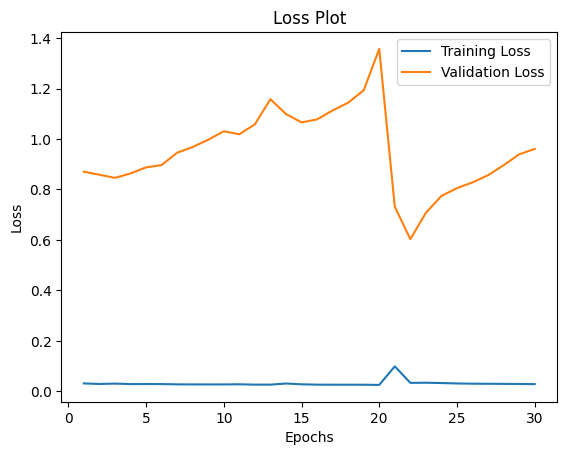

In [ ]:
# Access the loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss values
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss,  label='Training Loss')
plt.plot(epochs, val_loss,  label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
13/13 [==============================] - 1s 53ms/step - loss: 0.0445 - accuracy: 0.9767 - val_loss: 0.5290 - val_accuracy: 0.8351
Epoch 2/20
13/13 [==============================] - 2s 111ms/step - loss: 0.0517 - accuracy: 0.9715 - val_loss: 0.5361 - val_accuracy: 0.7835
Epoch 3/20
13/13 [==============================] - 1s 90ms/step - loss: 0.0826 - accuracy: 0.9793 - val_loss: 0.6147 - val_accuracy: 0.7526
Epoch 4/20
13/13 [==============================] - 2s 154ms/step - loss: 0.0582 - accuracy: 0.9819 - val_loss: 0.6354 - val_accuracy: 0.7423
Epoch 5/20
13/13 [==============================] - 1s 89ms/step - loss: 0.0516 - accuracy: 0.9819 - val_loss: 0.6671 - val_accuracy: 0.7526
Epoch 6/20
13/13 [==============================] - 2s 109ms/step - loss: 0.0460 - accuracy: 0.9819 - val_loss: 0.6721 - val_accuracy: 0.7526
Epoch 7/20
13/13 [==============================] - 1s 110ms/step - loss: 0.0442 - accuracy: 0.9767 - val_loss: 0.6690 - val_accuracy: 0.7526
Epoch 8/2

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(' Loss:', loss)
print('Accuracy:', accuracy)

4/4 [==============================] - 0s 7ms/step - loss: 0.9114 - accuracy: 0.7732
Test Loss: 0.9114330410957336
Test Accuracy: 0.7731958627700806


In [ ]:
model.save('B-122785.h5')